In [20]:
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
file_name = '1_robot_multiple_goals'
df = pd.read_csv(f'data/{file_name}.csv')
df

,frame,time,robot_id,radius,x,y,velocity_x,velocity_y,speed,has_collided,pref_vel_x,pref_vel_y
0,0,0.0000,0,0.09,-4.000,2.500,0.0,0.0,0.0,-1,0.0,0.0
1,0,0.0000,1,0.75,0.000,2.000,0.0,0.0,0.0,-1,0.0,0.0
2,0,0.0000,2,0.25,-4.500,-3.000,0.0,0.0,0.0,-1,0.0,0.0
3,0,0.0000,3,0.25,-4.500,3.000,0.0,0.0,0.0,-1,0.0,0.0
4,0,0.0000,4,0.25,-3.975,-3.000,0.0,0.0,0.0,-1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
26153,450,15.0001,53,0.25,4.500,1.200,0.0,0.0,0.0,-1,0.0,0.0
26154,450,15.0001,54,0.25,-4.500,1.725,0.0,0.0,0.0,-1,0.0,0.0
26155,450,15.0001,55,0.25,4.500,1.725,0.0,0.0,0.0,-1,0.0,0.0
26156,450,15.0001,56,0.25,-4.500,2.250,0.0,0.0,0.0,-1,0.0,0.0


In [22]:
num_robots = df['robot_id'].max() + 1
max_time = df['time'].max()
max_speed = df['speed'].max()

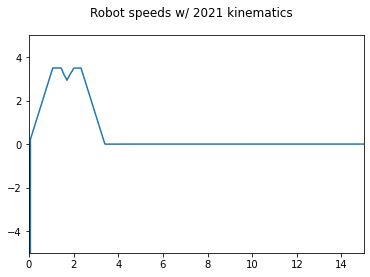

In [25]:
fig = plt.figure()

if False and num_robots > 1:
    fig, axs = plt.subplots(num_robots, sharex=True, sharey=True)
    fig.suptitle('Robot speeds w/ 2021 kinematics')

    time = df[df['robot_id'] == 0]['time']
    max_speed = df['speed'].max()
    for robot_id, ax in enumerate(axs):
        ax.set_ylim([0, max_speed])
        robot = df[df['robot_id'] == robot_id]
        speed = robot['speed']
        ax.plot(time, speed)
else:
    fig.suptitle('Robot speeds w/ 2021 kinematics')
    ax = fig.add_subplot(111, autoscale_on=False, xlim=(0, max_time), 
                                                  ylim=(0, max_speed * 1.25))

    time = df[df['robot_id'] == 0]['time']
    max_speed = df['speed'].max()
    
    ax.set_ylim([-5, 5])
    robot = df[df['robot_id'] == 0]
    speed = robot['velocity_x'] #['pref_vel_x'] #
    ax.plot(time, speed)


# Save plot
fig.savefig('plot/vel_w_kinematics.jpg', dpi=200)